### Importing requiued modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Independent Variable:

In [2]:
X= pd.read_csv("Mortality.csv")
X.shape

(3999, 42)

In [3]:
X.head(3)

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000


In [4]:
X.drop(labels=['Cholesterol', 'Gender', 'HCT', 
                 'ICUType', 'Height', 'Bilirubin', 
                   'RecordID'], axis=1, inplace=True)

In [5]:
X.shape

(3999, 35)

## Importing Dependent variable:

In [6]:
y = pd.read_csv("labels.csv")
y.shape

(3999, 1)

In [7]:
y.head(3)

,In-hospital_death
0,0
1,0
2,0


In [8]:
y

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


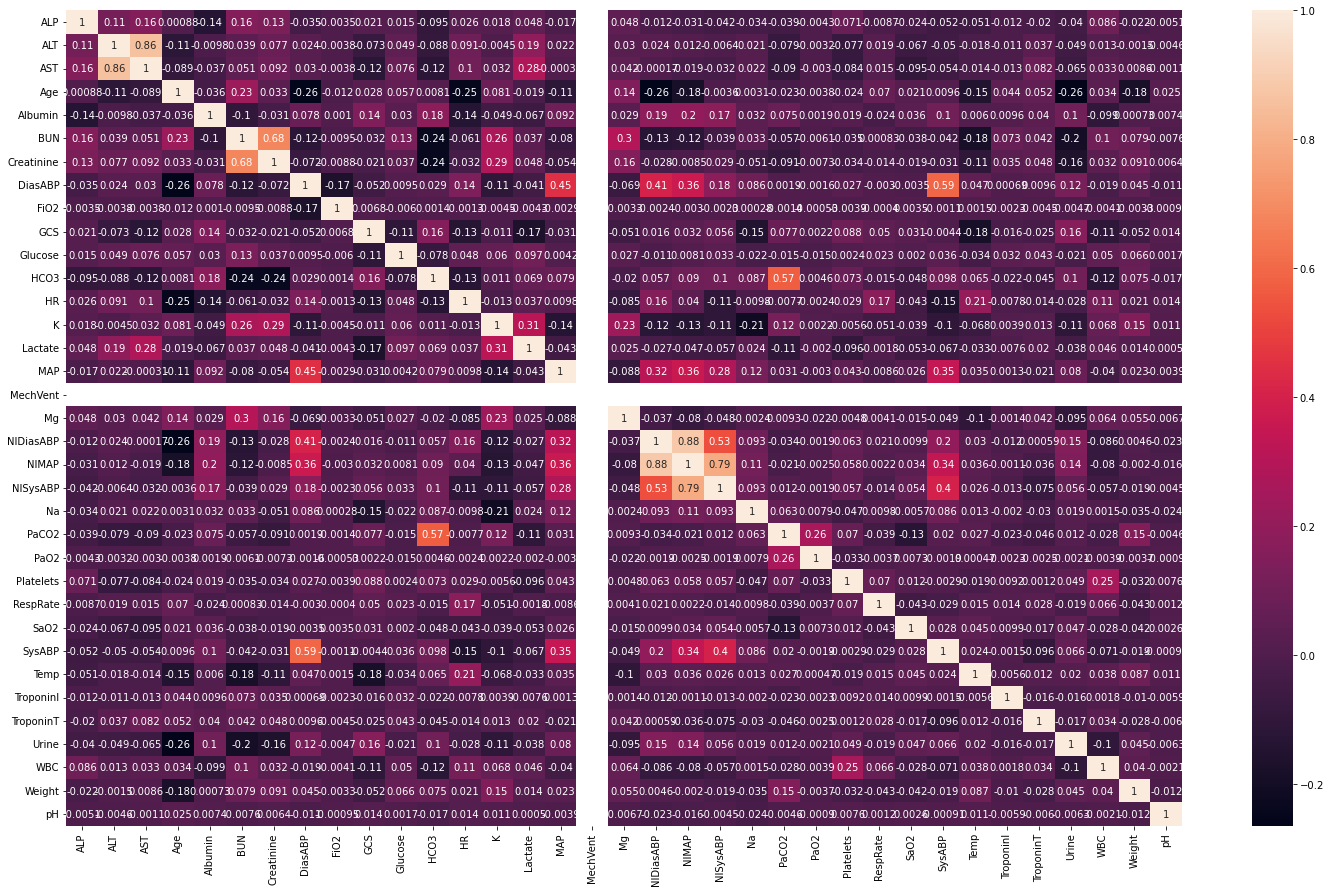

In [9]:
plt.figure(figsize=(25, 15))
sns.heatmap(X.corr(), annot=True)
plt.show()

### Feature Scaling:

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
for i in X:
    scaling = MinMaxScaler()
    X[i] = scaling.fit_transform(X[[i]])

In [12]:
X.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Creatinine,DiasABP,FiO2,GCS,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.052906,0.009705,0.007925,0.656634,0.446653,0.137615,0.071546,0.555588,0.000750,0.758233,...,0.298179,0.950015,0.650134,0.845745,0.042305,0.013623,0.043266,0.090577,0.267452,0.009632
std,0.048207,0.046747,0.037673,0.234175,0.096295,0.122115,0.086543,0.085126,0.027312,0.231113,...,0.071271,0.037519,0.091021,0.040177,0.049461,0.053106,0.038056,0.047152,0.077968,0.024434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044510,0.003063,0.002552,0.500000,0.446032,0.063767,0.030756,0.523535,0.000002,0.593407,...,0.290485,0.954751,0.611360,0.826854,0.036810,0.004786,0.024022,0.064171,0.218216,0.008611
50%,0.044510,0.003063,0.002552,0.693333,0.446032,0.099357,0.045108,0.551211,0.000002,0.816327,...,0.290485,0.955065,0.643235,0.846433,0.036810,0.005410,0.036022,0.082888,0.258216,0.008801
75%,0.047934,0.003200,0.002743,0.840000,0.452381,0.164607,0.071763,0.583219,0.000002,0.982143,...,0.300458,0.955065,0.679621,0.868287,0.036810,0.005410,0.052044,0.108289,0.301991,0.008966
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3199, 35), (800, 35), (3199, 1), (800, 1))

# Applying Machine Learning Algorithms:

## Decision Tree Algorithm:

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [17]:
y_pred = dt.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

In [19]:
c_metrix = confusion_matrix(y_pred, y_test)
print(c_metrix)

[[690 104]
 [  2   4]]


In [20]:
Score_DT = accuracy_score(y_pred, y_test)
Score_DT * 100

86.75

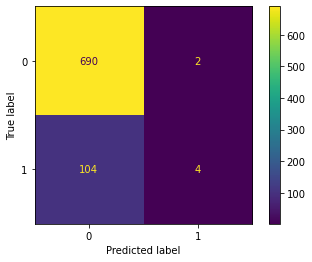

In [21]:
_ = plot_confusion_matrix(dt, X_test, y_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       692
           1       0.67      0.04      0.07       108

    accuracy                           0.87       800
   macro avg       0.77      0.52      0.50       800
weighted avg       0.84      0.87      0.81       800



## Logistic Regression:

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred_log = classifier.predict(X_test)
print(y_pred_log)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [26]:
c_metrix_log = confusion_matrix(y_pred_log, y_test)
print(c_metrix_log)

[[686  98]
 [  6  10]]


In [27]:
Score_log = accuracy_score(y_pred_log, y_test)
Score_log * 100

87.0

In [28]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       692
           1       0.62      0.09      0.16       108

    accuracy                           0.87       800
   macro avg       0.75      0.54      0.55       800
weighted avg       0.84      0.87      0.83       800



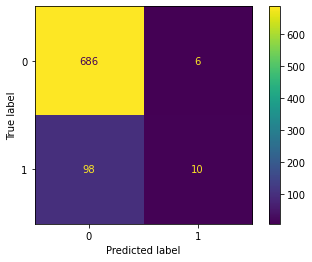

In [29]:
_ = plot_confusion_matrix(classifier, X_test, y_test)

## I applied two Machine Learning algorithms 
* Decision Tree got 86% accuracy score
* Logistic Regression got 87% accuracy score.

# Building Artificial Neural Network:

In [30]:
X.shape

(3999, 35)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [32]:
ann = Sequential()



ann.add(Dense(60, input_shape=(35, )))
ann.add(Activation("relu"))

ann.add(Dense(35))
ann.add(Activation("relu"))

ann.add(Dense(20))
ann.add(Activation("relu"))




ann.add(Dense(12))
ann.add(Activation("softmax"))



ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                2160      
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 35)                2135      
                                                                 
 activation_1 (Activation)   (None, 35)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                720       
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                2

In [33]:
ann.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
100/100 [==============================] - 1s 2ms/step - loss: 0.9750 - accuracy: 0.8237 - val_loss: 0.3970 - val_accuracy: 0.8650
Epoch 2/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8606 - val_loss: 0.3879 - val_accuracy: 0.8650
Epoch 3/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8606 - val_loss: 0.3647 - val_accuracy: 0.8650
Epoch 4/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8615 - val_loss: 0.3393 - val_accuracy: 0.8675
Epoch 5/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8634 - val_loss: 0.3379 - val_accuracy: 0.8687
Epoch 6/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8650 - val_loss: 0.3279 - val_accuracy: 0.8700
Epoch 7/30
100/100 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8671 - val_loss: 0.3338 - val_accuracy: 0.8675
Epoch 

## ANN got around 87% Accuracy score and loss also decreases from Max to Min.